In [1]:
import torch
from PIL import Image

from lavis.models import load_model_and_preprocess
from lavis.processors import load_processor

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


#### Load an example image and text

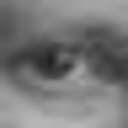

In [20]:
raw_image = Image.open("/home/lukavetoshkin/vision_labs/eyes_dataset/test/open/000108.jpg").convert("RGB")
display(raw_image.resize((128, 128)))

In [12]:
# setup device to use
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"

In [23]:
caption = "closed eye"

#### Load model and preprocessors

In [5]:
model, vis_processors, text_processors = load_model_and_preprocess("blip2_image_text_matching", "pretrain", device=device, is_eval=True)
# model, vis_processors, text_processors = load_model_and_preprocess("blip2_image_text_matching", "coco", device=device, is_eval=True)

WARNING - 2024-06-20 14:24:39,060 - warnings - /home/lukavetoshkin/anaconda3/envs/lavis/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(

INFO - 2024-06-20 14:24:48,508 - hub - Downloading: "https://storage.googleapis.com/sfr-vision-language-research/LAVIS/models/BLIP2/eva_vit_g.pth" to /home/lukavetoshkin/.cache/torch/hub/checkpoints/eva_vit_g.pth

100%|██████████| 1.89G/1.89G [02:18<00:00, 14.6MB/s]
INFO - 2024-06-20 14:27:10,812 - blip2_qformer - freeze vision encoder
INFO - 2024-06-20 14:27:12,894 - hub - Downloading: "https://storage.googleapis.com/sfr-vision-language-research/LAVIS/models/BLIP2/blip2_pretrained.pth" to /home/lukavetoshkin/.cache/torch/hub/checkpoints/blip2_pretrained.pth

100%|██████████| 712M/712M [00:50<00:00, 14.7MB/s] 
INFO - 2024-06-20 14:

#### Preprocess image and text inputs

In [24]:
img = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
txt = text_processors["eval"](caption)

#### Compute image-text matching (ITM) score

In [25]:
itm_output = model({"image": img, "text_input": txt}, match_head="itm")
itm_scores = torch.nn.functional.softmax(itm_output, dim=1)
print(f'The image and text are matched with a probability of {itm_scores[:, 1].item():.3%}')

The image and text are matched with a probability of 5.313%


In [26]:
itc_score = model({"image": img, "text_input": txt}, match_head='itc')
print('The image feature and text feature has a cosine similarity of %.4f'%itc_score)

The image feature and text feature has a cosine similarity of 0.3054


In [27]:
itm_output = model({"image": img, "text_input": 'open eye or pupil'}, match_head="itm")
itm_scores = torch.nn.functional.softmax(itm_output, dim=1)
print(f'The image and text are matched with a probability of {itm_scores[:, 1].item():.3%}')

The image and text are matched with a probability of 14.411%


In [38]:
import os
from tqdm import tqdm
preds = []

for item in tqdm(sorted(os.listdir('/home/lukavetoshkin/vision_labs/eyes_dataset/test/close'))):
    img_path = os.path.join('/home/lukavetoshkin/vision_labs/LAVIS/EyesDataset',item)
    raw_image = Image.open(img_path).convert("RGB")
    caption = 'closed eye '

    img = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
    txt = text_processors["eval"](caption)
    
    itm_output_closed = model({"image": img, "text_input": txt}, match_head="itm")
    itm_scores_closed = torch.nn.functional.softmax(itm_output_closed, dim=1)
    score_close = itm_scores_closed[:, 1]

    caption = 'open eye or pupil'
    txt = text_processors["eval"](caption)

    itm_output_opened = model({"image": img, "text_input": txt}, match_head="itm")
    itm_scores_opened = torch.nn.functional.softmax(itm_output_opened, dim=1)

    score_open = itm_scores_opened[:, 1]

    if score_open < score_close:
        preds.append(1)
    else:
        preds.append(0)
    
print ('accuracy', sum(preds)/50)


100%|██████████| 50/50 [00:05<00:00,  9.95it/s]

accuracy 0.88


In [37]:
import os
from tqdm import tqdm
preds = []

for item in tqdm(sorted(os.listdir('/home/lukavetoshkin/vision_labs/eyes_dataset/test/open'))):
    img_path = os.path.join('/home/lukavetoshkin/vision_labs/LAVIS/EyesDataset',item)
    raw_image = Image.open(img_path).convert("RGB")
    caption = 'closed eye '

    img = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
    txt = text_processors["eval"](caption)
    
    itm_output_closed = model({"image": img, "text_input": txt}, match_head="itm")
    itm_scores_closed = torch.nn.functional.softmax(itm_output_closed, dim=1)
    score_close = itm_scores_closed[:, 1]

    caption = 'open eye or pupil'
    txt = text_processors["eval"](caption)

    itm_output_opened = model({"image": img, "text_input": txt}, match_head="itm")
    itm_scores_opened = torch.nn.functional.softmax(itm_output_opened, dim=1)

    score_open = itm_scores_opened[:, 1]

    if score_open < score_close:
        preds.append(1)
    else:
        preds.append(0)
    
print ('accuracy', (50-sum(preds))/50)


100%|██████████| 50/50 [00:05<00:00,  9.80it/s]

accuracy 0.94


In [39]:
import os
from tqdm import tqdm
preds = []

for item in tqdm(sorted(os.listdir('/home/lukavetoshkin/vision_labs/LAVIS/EyesDataset'))):
    img_path = os.path.join('/home/lukavetoshkin/vision_labs/LAVIS/EyesDataset',item)
    raw_image = Image.open(img_path).convert("RGB")
    caption = 'closed eye '

    img = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
    txt = text_processors["eval"](caption)
    
    itm_output_closed = model({"image": img, "text_input": txt}, match_head="itm")
    itm_scores_closed = torch.nn.functional.softmax(itm_output_closed, dim=1)
    score_close = itm_scores_closed[:, 1]

    caption = 'open eye or pupil'
    txt = text_processors["eval"](caption)

    itm_output_opened = model({"image": img, "text_input": txt}, match_head="itm")
    itm_scores_opened = torch.nn.functional.softmax(itm_output_opened, dim=1)

    score_open = itm_scores_opened[:, 1]

    if score_open > score_close:
        path_save = os.path.join('/home/lukavetoshkin/vision_labs/LAVIS/eyes_dataset_labeled/open',item)
        raw_image.save(path_save)
    else:
        path_save = os.path.join('/home/lukavetoshkin/vision_labs/LAVIS/eyes_dataset_labeled/close',item)
        raw_image.save(path_save)


100%|██████████| 4000/4000 [06:32<00:00, 10.18it/s]
